C:\Users\HP DRAGON FLY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP DRAGON FLY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP DRAGON FLY\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklea

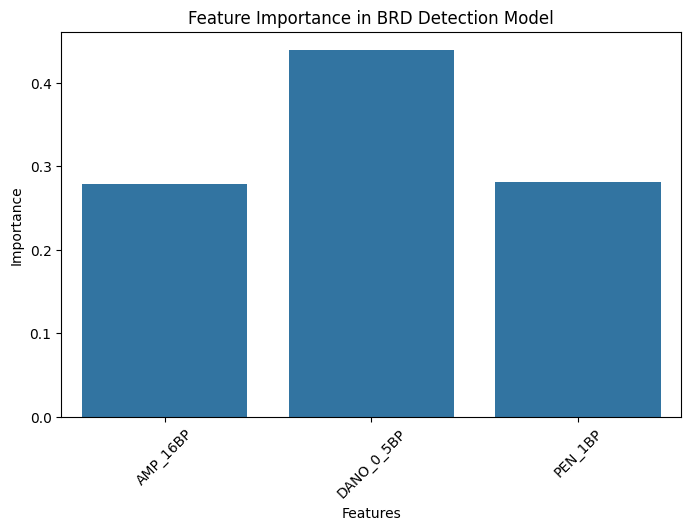


Model Training Results Table:
                      Learning Rate (conceptual)  \
0  Not applicable (RF doesn't use learning rate)   

   Training Rate (n_estimators)  Training Time (seconds)  Accuracy (%)  \
0                           100                 0.099035     64.705882   

                               Classification Report  
0                precision    recall  f1-score   ...  


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Load multiple TSV files
file_paths = {
    "AMP_16BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/AMP_16BP.tsv",
    "CLIND_4BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/CLIND_4BP.tsv",
    "DANO_0_5BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/DANO_0_5BP.tsv",
    "PEN_1BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/PEN_1BP.tsv",
    "TIAM_32BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/TIAM_32BP.tsv",
    "TIL_16BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/TIL_16BP.tsv",
    "TULA_32BP": "D:/Semester Two/Machine Learning/BRD Models/Datasets/metadata/TULA_32BP.tsv"
}

# Reading the data from the file paths
dfs = {name: pd.read_csv(path, sep="\t") for name, path in file_paths.items()}

# Standardize column names
for name, df in dfs.items():
    df.columns = ["Sample_ID", name]

# Merge datasets on 'Sample_ID'
meta_df = dfs["AMP_16BP"].merge(dfs["DANO_0_5BP"], on="Sample_ID", how="outer") \
                         .merge(dfs["PEN_1BP"], on="Sample_ID", how="outer")

# Fill missing values
meta_df.fillna(0, inplace=True)

# Simulated binary target (BRD_Label)
meta_df["BRD_Label"] = np.random.randint(0, 2, meta_df.shape[0])

# Prepare data for training
X = meta_df.drop(columns=["Sample_ID", "BRD_Label"])
y = meta_df["BRD_Label"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Start timing the training process
start_time = time.time()

# Train the model
model.fit(X_train, y_train)

# Stop timing after training is complete
end_time = time.time()
training_time = end_time - start_time

# Predict and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Get classification report
class_report = classification_report(y_test, y_pred)

# Feature importance visualization
plt.figure(figsize=(8, 5))
importance = model.feature_importances_
sns.barplot(x=X.columns, y=importance)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in BRD Detection Model")
plt.xticks(rotation=45)
plt.show()

# Create results table
results = {
    "Learning Rate (conceptual)": ["Not applicable (RF doesn't use learning rate)"],
    "Training Rate (n_estimators)": [model.n_estimators],  # Number of trees used in the model
    "Training Time (seconds)": [training_time],
    "Accuracy (%)": [accuracy * 100],  # Accuracy as percentage
    "Classification Report": [class_report]
}

# Convert results dictionary to DataFrame
results_table = pd.DataFrame(results)

# Display the results table
print("\nModel Training Results Table:")
print(results_table)
